# Assignment III: Classification: Will this Customer Purchase the Package?

### By Ranfei Xu

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Part I: Logistic Regression Model

### A. Bring the dataset travel.csv into your environment, and use the head() function to explore the variables.

In [323]:
%cd E:\22FALL\AD654\Assgn\AssngIII
dt = pd.read_csv("travel.csv")
dt.head()

E:\22FALL\AD654\Assgn\AssngIII


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [324]:
dt.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

### B. Which of the variables here are categorical? Which are numerical?

Answer: In this dataset, thera are 8 variables are numerical, which are 'Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'MonthlyIncome'.

While there are 11 categorical variables, which are 'ProdTaken', 'TypeofContact', 'CityTier','Occupation', 'Gender',  'ProductPitched', 'PreferredPropertyStar','MaritalStatus',  'Passport', 'OwnCar',  'Designation'.

### C. Use the value_counts() function from pandas to learn more about the outcome variable, ProdTaken. 

In [325]:
dt['ProdTaken'].value_counts(normalize=True, dropna=False)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

Describe your findings -- what are the different outcome
classes here, and how common are each of them in the dataset?

Answer: Based on the description of the dataset, class “1” means the person did take the vacation package offer, class “0” represents the opposite. We can see that 81% of people do not take the vacation package offer, while 19% of people take the offer.

### D. Compare the mean values of the variables in the dataset after grouping by ProdTaken. 

In [326]:
dt.groupby(['ProdTaken']).mean()

,CustomerID,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,,,,,,,,,,,,,
0,202405.107863,38.282092,1.615927,15.169325,2.901714,3.654286,3.542806,3.219531,0.233871,3.044355,0.622984,1.184190,23960.962835
1,202609.086957,34.770548,1.819565,16.873143,2.919565,3.941886,3.746171,3.308370,0.536957,3.223913,0.608696,1.200438,22172.827703


a. From the results you see here, choose any THREE independent variables from the dataset, and speculate about their likely impact on the result – do you think this variable will be strongly impactful? Why or why not?

Answer: I choose 'Age', 'PitchSatisfactionScore', 'MonthlyInconme' for further discussion. I think the variables I choose all strongly impact 'ProdTaken' since there is an obvious gap between the average value of different groups. 

More specifically, people who take the vacation package offer are 3.5 years younger than those who do not take it on average. People who have more satisfaction with the pitch are more likely to take the offer on average. The gap between satisfaction scores is 0.2/5. On average, people with less 1800 monthly income are more likely to take the offer. Maybe less income makes people more likely to accept a package offer for a discount (I assume the package offers include some deal).

### E. Examining correlations

a. Build a correlation table to examine the correlations among your numeric independent variables.

In [327]:
matrix = dt[['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'MonthlyIncome']].corr().round(decimals = 2)
# print correlation matrix
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
                           Age  DurationOfPitch  NumberOfPersonVisiting  \
Age                       1.00            -0.01                    0.01   
DurationOfPitch          -0.01             1.00                    0.07   
NumberOfPersonVisiting    0.01             0.07                    1.00   
NumberOfFollowups        -0.00             0.01                    0.33   
NumberOfTrips             0.18             0.01                    0.20   
PitchSatisfactionScore    0.02            -0.00                   -0.02   
NumberOfChildrenVisiting  0.01             0.03                    0.61   
MonthlyIncome             0.46            -0.01                    0.20   

                          NumberOfFollowups  NumberOfTrips  \
Age                                   -0.00           0.18   
DurationOfPitch                        0.01           0.01   
NumberOfPersonVisiting                 0.33           0.20   
NumberOfFollowups                      1.00        

Answer: I think only 'NumberOfPersonVisiting' and 'NumberOfChildrenVisiting' have a high correlation which may lead to some problems with multicollinearity. I prefer to remove 'NumberOfChildrenVisiting' since it contains 66 missing values (as shown in the next question) while 'NumberOfPersonVisiting' doesn't. I will process this function after answering F(a).

### F. Handling missing values.

a. Which columns contain missing values? How many of their values are missing?

In [328]:
print(dt.isnull().sum())

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64


Answer: In our data set, we can see variables 'Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome' (numeric), and 'TypeofContact' (categorical) include different amount of missing value.

b. To address the issue of missingness in this dataset, use any approach of your choice.

In [329]:
# removeone member of the highly-correlated pair
dt.drop(['NumberOfChildrenVisiting'],axis=1, inplace=True)

In [330]:
# Find out the sum of missing values in each column groupby ProdTaken
dt.isnull().groupby(dt['ProdTaken']).sum()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
ProdTaken,,,,,,,,,,,,,,,,,,,
0,0,0,182,22,0,206,0,0,0,37,0,20,0,128,0,0,0,0,201
1,0,0,44,3,0,45,0,0,0,8,0,6,0,12,0,0,0,0,32


In [331]:
# Find out the percentage of missing values in each column groupby ProdTaken
dt.isnull().groupby(dt['ProdTaken']).mean()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
ProdTaken,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.045867,0.005544,0.0,0.051915,0.0,0.0,0.0,0.009325,0.0,0.005040,0.0,0.032258,0.0,0.0,0.0,0.0,0.050655
1,0.0,0.0,0.047826,0.003261,0.0,0.048913,0.0,0.0,0.0,0.008696,0.0,0.006522,0.0,0.013043,0.0,0.0,0.0,0.0,0.034783


Answer: I found that the proportion of missing values in each column after being grouped by 'ProdTaken' is similar, so I decided to impute the missing value for numeric variables with the mean value of each group and round with 0 decimals. In this way, we can impute a meaningful value for different columns easily and quickly and without apparent change in the mean value of each group. For example, imputing the exact mean value with a decimal for 'NumberOfFollowups' or 'NumberOfTrips' makes no sense.

As for categorical variable, I decide to impute with the mode.

In [332]:
# reference code
# dataframe.fillna(dataframe['Count'].mean(), inplace = True)
# df["value"] = df.groupby("name").transform(lambda x: x.fillna(x.mean()))
# df['value'] = df['value'].fillna(df.groupby('name')['value'].transform('mean'))

In [333]:
# use mean to impute missing value in numeric variables
columns = ['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','MonthlyIncome']
dt[columns] = dt[columns].fillna(dt.groupby('ProdTaken')[columns].transform('mean').round(0))

In [334]:
# use mod to impute missing value in categorical variables
dt['TypeofContact'] = dt['TypeofContact'].fillna(dt['TypeofContact'].mode()[0])

In [335]:
# check
print(dt.isnull().sum())

CustomerID                0
ProdTaken                 0
Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfPersonVisiting    0
NumberOfFollowups         0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
PitchSatisfactionScore    0
OwnCar                    0
Designation               0
MonthlyIncome             0
dtype: int64


### G. For your categorical input variables, which ones require further handling in order to be dummified for use in a model? Which ones are okay in their current format?

a. For any variables that need further treatment, dummify them, being sure to drop one level as you do.

Answer: Since Logistic Regression can only deal with continuous data, we need to dummified the categorical input variables recorded in numeric format, which are 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation'. Since 'CityTier', 'PreferredPropertyStar', 'Passport' and 'OwnCar' already record in digital format. it's not necessary to be further dummified.

In [336]:
dt_dummy = pd.get_dummies(dt, drop_first=True, columns=['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation'])
dt_dummy.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,...,0,0,0,0,1,0,0,1,0,0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,...,0,0,0,0,0,0,0,1,0,0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,...,0,0,0,0,1,0,1,0,0,0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,...,0,0,0,0,0,0,1,0,0,0
4,200004,0,38.0,1,8.0,2,3.0,4.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0


### H. Create a data partition. Assign 40% of your rows to your test set, and 60% to your training set.

a. How did you pick your seed value?

Answer: live at 200 Market St, I live in 1110 Commonwealth Avenue, so I use 1110 as myrandom_state value

In [337]:
dt_dummy.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'MonthlyIncome', 'TypeofContact_Self Enquiry',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Female', 'Gender_Male',
       'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

In [338]:
X = dt_dummy[['Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'MonthlyIncome', 'TypeofContact_Self Enquiry',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Female', 'Gender_Male',
       'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']]
y = dt_dummy['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1110)

### I. Build a logistic regression model using statsmodels, with the outcome variable ProdTaken. Use the rest of the variables from the dataset as inputs (except CustomerID). Remember to use only your training data to build this model.

In [339]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

D:\app\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### J. Show the summary of your model with log_reg.summary(). 

In [340]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.367693
         Iterations 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ProdTaken   No. Observations:                 2932
Model:                          Logit   Df Residuals:                     2907
Method:                           MLE   Df Model:                           24
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.2445
Time:                        14:48:23   Log-Likelihood:                -1078.1
converged:                       True   LL-Null:                       -1426.9
Covariance Type:            nonrobust   LLR p-value:                7.468e-132
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age                            -0.0219      0.007     -3.059      0.002      -0.036      -0.008
CityTier                        0.5544      0.065      8.500      0.000       0.427       0.682
DurationOfPitch                 0.0274      0.007      4.172      0.000       0.015       0.040
NumberOfPersonVisiting         -0.1268      0.087     -1.460      0.144      -0.297       0.043
NumberOfFollowups               0.3379      0.064      5.283      0.000       0.213       0.463
PreferredPropertyStar           0.4363      0.066      6.602      0.000       0.307       0.566
NumberOfTrips                   0.1142      0.031      3.629      0.000       0.053       0.176
Passport                        1.5968      0.115     13.873      0.000       1.371       1.822
PitchSatisfactionScore          0.1049      0.041      2.572      0.010       0.025       0.185
OwnCar                          0.0998      0.113      0.882      0.378      -0.122       0.322
MonthlyIncome               -1.447e-05   2.05e-05     -0.707      0.480   -5.46e-05    2.57e-05
TypeofContact_Self Enquiry     -0.3503      0.119     -2.939      0.003      -0.584      -0.117
Occupation_Large Business     -58.9129   2.51e+06  -2.35e-05      1.000   -4.92e+06    4.92e+06
Occupation_Salaried           -59.3677   2.51e+06  -2.36e-05      1.000   -4.92e+06    4.92e+06
Occupation_Small Business     -59.2265   2.51e+06  -2.36e-05      1.000   -4.92e+06    4.92e+06
Gender_Female                   0.2005      0.354      0.567      0.571      -0.493       0.894
Gender_Male                     0.6220      0.343      1.812      0.070      -0.051       1.295
ProductPitched_Deluxe          26.1984        nan        nan        nan         nan         nan
ProductPitched_King            26.5145   2.82e+07   9.39e-07      1.000   -5.53e+07    5.53e+07
ProductPitched_Standard        26.5051   1.05e+07   2.54e-06      1.000   -2.05e+07    2.05e+07
ProductPitched_Super Deluxe    51.3713   2.51e+06   2.05e-05      1.000   -4.92e+06    4.92e+06
MaritalStatus_Married          -0.1171      0.159     -0.736      0.462      -0.429       0.195
MaritalStatus_Single            1.0325      0.176      5.865      0.000       0.687       1.377
MaritalStatus_Unmarried         0.6860      0.201      3.407      0.001       0.291       1.081
Designation_Executive          53.9341   2.51e+06   2.15e-05      1.000   -4.92e+06    4.92e+06
Designation_Manager            26.1984        nan        nan        nan         nan         nan
Designation_Senior Manager     26.5051   1.04e+07   2.56e-06      1.000   -2.03e+07    2.03e+07
Designation_VP                 26.5145   2.81e+07   9.43e-07      1.000   -5.51e+07    5.51e+07
===============================================================================================
"""

a. Which of your categorical variables are showing ‘nan’ results for standard errors?

Answer: As it's shown above, 'Designation' and 'ProductPitched' are showing ‘nan’ results for standard errors.

### K. Now, build another model. 

Again, use statsmodels, and again, use your training set variables. However, this time, completely remove any categorical variable that you identified in the previous step as having any nan value in your results table. If one or more levels of that variable showed those nans, just remove the entire category.

a. Show the results of this 2nd model with log_reg.summary().

In [341]:
X = dt_dummy[['Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'MonthlyIncome', 'TypeofContact_Self Enquiry',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Female', 'Gender_Male',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried']]
y = dt_dummy['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1110)

log_reg = sm.Logit(y_train, X_train).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.387939
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ProdTaken   No. Observations:                 2932
Model:                          Logit   Df Residuals:                     2912
Method:                           MLE   Df Model:                           19
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.2029
Time:                        14:48:23   Log-Likelihood:                -1137.4
converged:                       True   LL-Null:                       -1426.9
Covariance Type:            nonrobust   LLR p-value:                1.353e-110
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0330      0.007     -4.736      0.000      -0.047      -0.019
CityTier                       0.3206      0.058      5.575      0.000       0.208       0.433
DurationOfPitch                0.0241      0.006      3.914      0.000       0.012       0.036
NumberOfPersonVisiting         0.0231      0.082      0.280      0.779      -0.138       0.184
NumberOfFollowups              0.3625      0.062      5.874      0.000       0.242       0.483
PreferredPropertyStar          0.4364      0.064      6.814      0.000       0.311       0.562
NumberOfTrips                  0.0982      0.030      3.241      0.001       0.039       0.158
Passport                       1.5734      0.111     14.167      0.000       1.356       1.791
PitchSatisfactionScore         0.1051      0.040      2.656      0.008       0.028       0.183
OwnCar                         0.0338      0.110      0.307      0.759      -0.182       0.249
MonthlyIncome              -8.343e-05   1.49e-05     -5.600      0.000      -0.000   -5.42e-05
TypeofContact_Self Enquiry    -0.2948      0.115     -2.562      0.010      -0.520      -0.069
Occupation_Large Business     -3.8493      0.641     -6.007      0.000      -5.105      -2.593
Occupation_Salaried           -4.3416      0.622     -6.980      0.000      -5.561      -3.123
Occupation_Small Business     -4.2233      0.625     -6.757      0.000      -5.448      -2.998
Gender_Female                  0.3216      0.347      0.927      0.354      -0.358       1.001
Gender_Male                    0.7575      0.337      2.250      0.024       0.098       1.417
MaritalStatus_Married         -0.0889      0.155     -0.572      0.567      -0.394       0.216
MaritalStatus_Single           1.1351      0.170      6.663      0.000       0.801       1.469
MaritalStatus_Unmarried        0.6021      0.195      3.083      0.002       0.219       0.985
==============================================================================================
"""

b. Which of your numeric input variables are showing high p-values?

Answer: 'NumberOfPersonVisiting' has high p-value.

c. Which of your categorical input variables are showing high p-values for
ALL of their levels?

Answer: 'OwnCar' has high p-value.

### L. Now, build yet another model. 

Start with the variables you used in Iteration #2 but drop the ones you identified in the previous step, for parts (b) and (c).

a. Show the results of this 3rd model with log_reg.summary()

In [342]:
X = dt_dummy[['Age', 'CityTier', 'DurationOfPitch',
       'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 
       'MonthlyIncome', 'TypeofContact_Self Enquiry',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Female', 'Gender_Male',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried']]
y = dt_dummy['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1110)

log_reg = sm.Logit(y_train, X_train).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.387969
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ProdTaken   No. Observations:                 2932
Model:                          Logit   Df Residuals:                     2914
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.2028
Time:                        14:48:24   Log-Likelihood:                -1137.5
converged:                       True   LL-Null:                       -1426.9
Covariance Type:            nonrobust   LLR p-value:                4.308e-112
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0331      0.007     -4.774      0.000      -0.047      -0.020
CityTier                       0.3192      0.057      5.566      0.000       0.207       0.432
DurationOfPitch                0.0241      0.006      3.929      0.000       0.012       0.036
NumberOfFollowups              0.3674      0.059      6.204      0.000       0.251       0.483
PreferredPropertyStar          0.4371      0.064      6.829      0.000       0.312       0.563
NumberOfTrips                  0.0990      0.030      3.288      0.001       0.040       0.158
Passport                       1.5732      0.111     14.184      0.000       1.356       1.791
PitchSatisfactionScore         0.1061      0.039      2.690      0.007       0.029       0.183
MonthlyIncome              -8.233e-05   1.46e-05     -5.651      0.000      -0.000   -5.38e-05
TypeofContact_Self Enquiry    -0.2960      0.115     -2.573      0.010      -0.521      -0.071
Occupation_Large Business     -3.8000      0.628     -6.051      0.000      -5.031      -2.569
Occupation_Salaried           -4.2930      0.608     -7.055      0.000      -5.486      -3.100
Occupation_Small Business     -4.1753      0.612     -6.825      0.000      -5.374      -2.976
Gender_Female                  0.3188      0.347      0.920      0.358      -0.361       0.998
Gender_Male                    0.7539      0.337      2.240      0.025       0.094       1.414
MaritalStatus_Married         -0.0907      0.155     -0.584      0.559      -0.395       0.214
MaritalStatus_Single           1.1269      0.169      6.671      0.000       0.796       1.458
MaritalStatus_Unmarried        0.6008      0.195      3.081      0.002       0.219       0.983
==============================================================================================
"""

### M. Using scikit-learn, build another version of Model Iteration #3. You will use this version of the model for all remaining steps.

In [343]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

### N. Assess the performance of your model against the test set. Build a confusion matrix, and answer the following questions about your model. (Positive = 1)

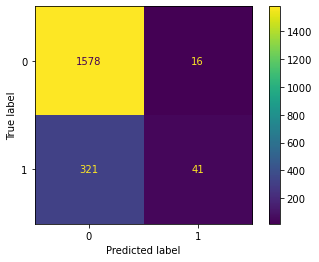

In [344]:
# reference:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

plot_confusion_matrix(logmodel, X_test, y_test)  
plt.show()

Q&A:

a. What is your model’s accuracy rate? 

b. What is your model’s sensitivity rate? 

c. What is your model’s specificity rate? 

d. What is your model’s precision? 

e. What is your model’s balanced accuracy?

In [345]:
TP = 41
FP = 16
TN = 1578
FN = 321

Acurracy = (TP+TN)/(TP+TN+FP+FN)
print("Acurracy:",round(Acurracy,2))

Acurracy: 0.83


In [346]:
Sensitivity = TP/(TP+FN)
print("Sensitivity:",round(Sensitivity,2))

Sensitivity: 0.11


In [347]:
Specificity = TN/(FP+TN)
print("Specificity:",round(Specificity,2))

Specificity: 0.99


In [348]:
Precision = TP/(TP+FP)
print("Precision:",round(Precision,2))

Precision: 0.72


In [349]:
balanced_accuracy = (Sensitivity + Specificity)/2
print("Balanced accuracy:",round(balanced_accuracy,2))

Balanced accuracy: 0.55


### O. Compare your model’s accuracy against the training set vs. accuracy against the test set (just use accuracy only for this).

In [350]:
predictions_train = logmodel.predict(X_train)
print("Accuracy on training set:", metrics.accuracy_score(y_train, predictions_train))

Accuracy on training set: 0.8298090040927695


a. What is the purpose of comparing those two values?

Answer: To check if there exist problem of overfit or underfit.

In [351]:
y_test.value_counts()

0    1594
1     362
Name: ProdTaken, dtype: int64

In [352]:
np.array(np.unique(predictions, return_counts=True)).T

array([[   0, 1899],
       [   1,   57]], dtype=int64)

In [353]:
y_train.value_counts()

0    2374
1     558
Name: ProdTaken, dtype: int64

In [354]:
np.array(np.unique(predictions_train, return_counts=True)).T

array([[   0, 2835],
       [   1,   97]], dtype=int64)

b. In this case, what does the comparison of those values suggest about the
model that you have built?

Answer: Based on the prediction result on both training and test sets, I think since the majority value of 'ProdTaken' is 0, my model is inclined to predict the output as 0. Thus, the model has over high specificity but over low sensitivity. Therefore, the balanced_accuracy of my model is just around 50%, which means the model has little use.


### P. Make up a household. 

Assign this household a value for each predictor variable
in this model, and store the results in a new dataframe. Now, put your
household through this model.

In [355]:
ranfei = pd.DataFrame([{'Age':25, 'CityTier':1, 'DurationOfPitch':10,
       'NumberOfFollowups':4, 'PreferredPropertyStar':4,
       'NumberOfTrips':5, 'Passport':1, 'PitchSatisfactionScore':4, 
       'MonthlyIncome':18000, 'TypeofContact_Self Enquiry':0,
       'Occupation_Large Business':0, 'Occupation_Salaried':1,
       'Occupation_Small Business':0, 'Gender_Female':1, 'Gender_Male':0,
       'MaritalStatus_Married':0, 'MaritalStatus_Single':1,
       'MaritalStatus_Unmarried':0}])
prediction_ranfei = logmodel.predict(ranfei)
prediction_ranfei

array([1], dtype=int64)

In [356]:
logmodel.predict_proba(ranfei)

array([[0.43053379, 0.56946621]])

a. What did your model predict -- will this household take the return offer?

Answer: This household will take the return offer.

b. According to your model, what is the probability that the household will
accept the offer?

Answer: The probability is 56.95%.

### Q. When using a logistic regression model to make predictions, why is it important to only use values within the range of the dataset used to build the model?

a. Make a new dataframe, but this time, for the numeric predictor variables,
select some numbers that are outside the range of the dataset

In [357]:
page = pd.DataFrame([{'Age':35, 'CityTier':1, 'DurationOfPitch':10,
       'NumberOfFollowups':4, 'PreferredPropertyStar':4,
       'NumberOfTrips':5, 'Passport':1, 'PitchSatisfactionScore':4, 
       'MonthlyIncome':200000, 'TypeofContact_Self Enquiry':0,
       'Occupation_Large Business':0, 'Occupation_Salaried':1,
       'Occupation_Small Business':0, 'Gender_Female':0, 'Gender_Male':1,
       'MaritalStatus_Married':0, 'MaritalStatus_Single':1,
       'MaritalStatus_Unmarried':0}])
logmodel.predict_proba(page)

array([[1.00000000e+00, 5.20770338e-11]])

Answer: I change monthlyIncome to be the outrange input number. As shown above, the model seems to be 100% sure about its prediction, which runs counter to common sense. Our original model doesn't include sufficient data around this specific value to build the model. Thus, the forecast will locate in the heads/ends of the sigmoid curve, which means it has an extreme probability of 0 or 1. Therefore, it is essential to only use values within the range of the dataset used to build the model. 

# Part II: Random Forest Model

### R. Read the dataset back into Python. Dummify the categorical inputs again, but this time, don’t drop any levels.

### S. To handle the missing values, use the same process that you used in the previous section.

In [358]:
dt = pd.read_csv("travel.csv")
dt.drop(['NumberOfChildrenVisiting'],axis=1, inplace=True)
# use mean to impute missing value in numeric variables
columns = ['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','MonthlyIncome']
dt[columns] = dt[columns].fillna(dt.groupby('ProdTaken')[columns].transform('mean').round(0))
# use mod to impute missing value in categorical variables
dt['TypeofContact'] = dt['TypeofContact'].fillna(dt['TypeofContact'].mode()[0])
# check
print(dt.isnull().sum())

CustomerID                0
ProdTaken                 0
Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfPersonVisiting    0
NumberOfFollowups         0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
PitchSatisfactionScore    0
OwnCar                    0
Designation               0
MonthlyIncome             0
dtype: int64


In [359]:
dt_dummy = pd.get_dummies(dt, drop_first=True, columns=['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation'])
dt_dummy.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'MonthlyIncome', 'TypeofContact_Self Enquiry',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Female', 'Gender_Male',
       'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

# T. Re-partition the data, using the same seed value that you used in the previous part of this assignment.

In [360]:
X = dt_dummy[['Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'MonthlyIncome', 'TypeofContact_Self Enquiry',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Female', 'Gender_Male',
       'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']]
y = dt_dummy['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1110)

### U. Build a random forest model in Python with your training set. Use the same input variables, and same output variable, as you used in the first logistic regression model (the only difference here is that the categories should not have any levels dropped). Use GridSearchCV to help you determine the best hyperparameter settings for your model.

In [361]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 10],
    'max_features': [6, 12, 18], # don't exceed p-1
    'min_samples_leaf': [6, 10, 14, 18],
}

In [362]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 10, 'max_features': 18, 'min_samples_leaf': 6, 'n_estimators': 150}


In [363]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=150, max_depth=10,max_features=18, min_samples_leaf=6, random_state=1110)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=18, min_samples_leaf=6,
                       n_estimators=150, random_state=1110)

In [364]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending= False)
feature_imp_df

,feature importance,feature
0,0.139849,Age
7,0.134313,Passport
10,0.129497,MonthlyIncome
2,0.112001,DurationOfPitch
24,0.082810,Designation_Executive
1,0.045703,CityTier
5,0.042085,PreferredPropertyStar
8,0.041539,PitchSatisfactionScore
6,0.040302,NumberOfTrips
4,0.034752,NumberOfFollowups


### V. How did your random forest model rank the variables in order of importance, from highest to lowest? For a random forest model, how can you interpret feature importance?


Answer: One of the official explanations is that 'feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature'. In my word, more importance means the variable is more informative, which results in fewer classification errors compared to others.

In my model, the top 3 features that influence whether or not to take the offer are 'Age', 'Passport', and 'MonthlyIncome'. And the least influential variables are 'Designation' and 'ProducPitched'.

### W. Assess the performance of your model against the test set. Build a confusion matrix to do this. You can use Python functions to answer any of these questions or you can use your confusion matrix to determine the answers in a slightly more manual way. The ‘positive’ class in this model is represented by the “1” outcome.

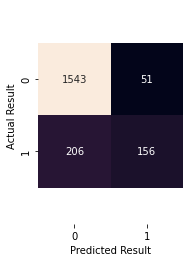

In [365]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

Q&A:

a. What is your model’s accuracy rate? 

b. What is your model’s sensitivity rate? 

c. What is your model’s specificity rate? 

d. What is your model’s precision? 

e. What is your model’s balanced accuracy?

In [366]:
TP = 156
FP = 51
TN = 1543
FN = 206
Acurracy = (TP+TN)/(TP+TN+FP+FN)
print("Acurracy:",round(Acurracy,2))

Acurracy: 0.87


In [367]:
Sensitivity = TP/(TP+FN)
print("Sensitivity:",round(Sensitivity,2))

Sensitivity: 0.43


In [368]:
Specificity = TN/(FP+TN)
print("Specificity:",round(Specificity,2))

Specificity: 0.97


In [369]:
Precision = TP/(TP+FP)
print("Precision:",round(Precision,2))

Precision: 0.75


In [370]:
balanced_accuracy = (Sensitivity + Specificity)/2
print("Balanced accuracy:",round(balanced_accuracy,2))

Balanced accuracy: 0.7


### X. Compare your model’s accuracy against the training set vs. your model’s accuracy against the test set. How different were these results?

In [371]:
predictions_train = clf.predict(X_train)
print("Accuracy on training set:", metrics.accuracy_score(y_train, predictions_train))

Accuracy on training set: 0.9191678035470668


Answer: The accuracy of predict on the training set is slightly higher than applied on the test set is reasonable. Since the model is built based on the training set, it's more inclined to capture the feature on the training set.


### Y. Use the predict() function with your model to classify the person who you invented in the previous section. Does the model think this household will accept the return offer?

In [372]:
X_train.columns

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome',
       'TypeofContact_Self Enquiry', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female',
       'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

In [373]:
ranfei = pd.DataFrame([{'Age':25, 'CityTier':1, 'DurationOfPitch':10,
       'NumberOfFollowups':4, 'PreferredPropertyStar':4,
       'NumberOfTrips':5, 'Passport':1, 'PitchSatisfactionScore':4, 
       'MonthlyIncome':18000, 'TypeofContact_Self Enquiry':0,
       'Occupation_Large Business':0, 'Occupation_Salaried':1,
       'Occupation_Small Business':0, 'Gender_Female':1, 'Gender_Male':0,
       'MaritalStatus_Married':0, 'MaritalStatus_Single':1,
       'MaritalStatus_Unmarried':0,
                       'NumberOfPersonVisiting':4, 'OwnCar':0,
       'ProductPitched_Deluxe':0, 'ProductPitched_King':0,
       'ProductPitched_Standard':1, 'ProductPitched_Super Deluxe':0, 'Designation_Executive':0,
       'Designation_Manager':0, 'Designation_Senior Manager':0, 'Designation_VP':1}])

clf.predict_proba(ranfei).round(3)

array([[0.572, 0.428]])

Answer: It's impractical to use the previous fiction input directly because of the size conflicting problem. In the last section, we drop off several features before we create the fiction data frame, so I need to add them back to the input for DecisionTreeClassifier.

As shown above, ranfei is more likely to reject the vacation package offer.

### Z. Write a 3-5 sentence paragraph that speculates about why Lobster Land might care about being able to use this model. There is not a single “correct” answer to this question. Be thoughtful and be creative, and consider the impact of being able to predict whether a specific household will accept a particular offer and/or how likely they are to accept it. You can mention a marketing angle, an operations angle, or anything else that comes to mind.

Answer: 

Suppose we can predict the customer's behavior based on existing data. In that case, the sales can reach out to the existing customers who are more likely to accept the offer, which can improve work efficiency and reduce the waste of human resources. This result can also help with marketing advertising. By sorting out the features of customers who have taken the offer, we can target new consumers more efficiently.

Based on the feature importance result, we can invest more time, money, and energy in the more essential features to allocate resources better.

# Part III: Wildcard 

First, find the Yelp review page for a restaurant, coffee shop, or other establishment. Using any web-based wordcloud tool, generate a wordcloud of these Yelp reviews. 

### Part 1: extract the reviews using python

In [374]:
# refer to Yuli Jin's code:

import requests
import re
from bs4 import BeautifulSoup

URL_p1 = "https://www.yelp.com/biz/bakey-boston-2?start="
page = 10
def get_url_array(url,page):  
    page_str = np.arange(0,page*10,10).astype(str)
    url_array = np.char.add(np.array([url]), page_str)
    return url_array

In [375]:
# extract 5 pages reviews
url_array = get_url_array(url=URL_p1,page=5)
# url_array

In [389]:
store_list = []
for url in url_array:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    comment_inter_list=soup.find_all('p',attrs={'class':re.compile(r'comment')})
    comment_list = list(map(lambda x: x.text,comment_inter_list))
    store_list.extend(comment_list)
    # print(url,' complete')
    # print(len(store_list))

In [390]:
text = " ".join(comment for comment in store_list)
text = text.lower()

### Part 2: generate wordcloud using python

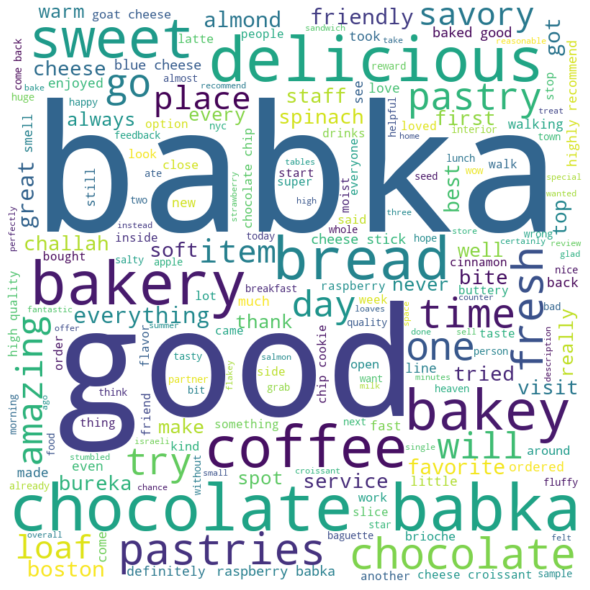

In [392]:
# reference https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


### Part 3: generate wordcloud using web-based wordcloud tool

In [394]:
# saveto a text file
file = open("text.txt", "w+")
file.write(text)
file.close()
# web-based wordcloud tool: https://worditout.com/word-cloud/create

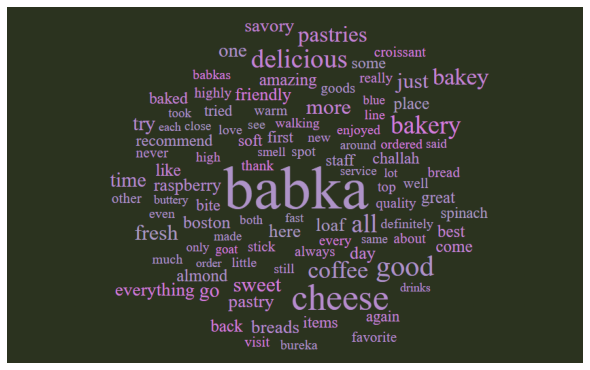

In [395]:
# display screenshot
import matplotlib.pyplot as plt
import matplotlib.image as img
  
# reading png image file
im = img.imread('wordcloud.png')
  
# show image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(im)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Part 4: Description: 

I generate the wordcoulds using a web-based wordcloud tool and python to see if there is any significant difference. 

The BAKEY is a bakery store next to the Boston Common, famous for its chocolate and almond babka loaf, with a 4.8 score over 102 reviews. I have been there or asked for delivery at least twice a month, even if it's far from where I live, and I try more than half of their products. As a loyal customer, I like chocolate and almond babka loaf the most. Bakey has a clean environment and friendly staff and offers sparkling water,  coffee, and salad. One of my happiest memories in summer is buying some products in Bakey and walking to the Boston Common, finding a bench or a piece of grass, sitting down, and enjoying my meal. I think the wordcoulds generated based on the word's frequency fits well with my own experience. As it shown above, the most frequent words include 'babka', 'good','bakery' ,'cheese', 'coffee'..